# Data Aggregation and Group Operations

# What is data aggregation?

* Data aggregation is the process of gathering data and presenting it in a summarized format. 
* The data may be gathered from multiple data sources with the intent of combining these data sources into a summary for data analysis.
* Data aggregation is useful for everything from finance or business strategy decisions to product, pricing, operations, and marketing strategies.


# Example

## Aggregate data in business - 

    Companies often collect data on their online customers and website visitors. The aggregate data would include statistics on customer demographic and behavior metrics, such as average age or number of transactions.



# Pnadas Provide following - 
<pre>
Aggregation	        Description
count()	            Total number of items
first(), last()	    First and last item
mean(), median()	Mean and median
min(), max()	    Minimum and maximum
std(), var()	    Standard deviation and variance
mad()	            Mean absolute deviation
prod()	            Product of all items
sum()	            Sum of all items
</pre>

# GroupBy - split-apply-combine
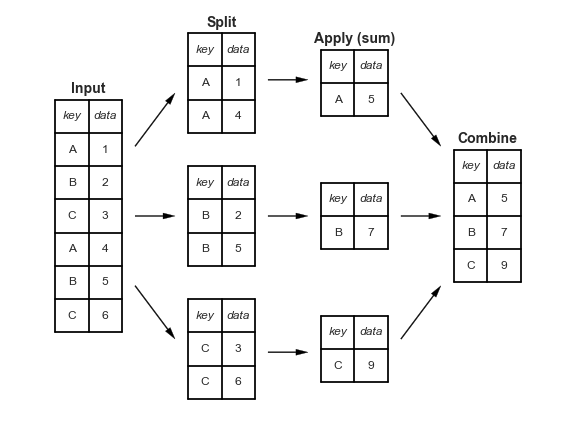

> The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.

> The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.

> The combine step merges the results of these operations into an output array.

In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'data1' : np.random.randint(100,200,5),
                   'data2' : np.random.randint(200,300,5)})
df

,key1,data1,data2
0,a,115,282
1,a,146,276
2,b,132,205
3,b,114,216
4,a,160,200


### The most basic split-apply-combine operation can be computed with the groupby() method of DataFrame

In [106]:
df.groupby('key1')

### Note - 

Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy object.

It has not actually computed anything yet except for some intermediate data about the group key - 'key1'

We can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result

In [24]:
df.groupby('key1').sum()

,data1,data2
key1,,
a,431,697
b,333,522


In [108]:
df.groupby('key1').count()

,data1,data2
key1,,
a,3,3
b,2,2


#  groupedby on multiple keys

In [109]:
df['key2']=['one', 'two', 'one', 'two', 'one']
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [110]:
grouped= df.groupby(['key1','key2'])

In [112]:
grouped.first()

data1  data2
key1 key2              
a    one     115    282
     two     146    276
b    one     132    205
     two     114    216

# Iterating Over Groups

The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data

In [113]:
for name, data in grouped:
    print(name)
    print()
    print(data)

('a', 'one')

  key1  data1  data2 key2
0    a    115    282  one
4    a    160    200  one
('a', 'two')

  key1  data1  data2 key2
1    a    146    276  two
('b', 'one')

  key1  data1  data2 key2
2    b    132    205  one
('b', 'two')

  key1  data1  data2 key2
3    b    114    216  two


In [121]:
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [120]:
for name,data in df.groupby('key1'):
    print(name)
    print(data)
    print()

a
  key1  data1  data2 key2
0    a    115    282  one
1    a    146    276  two
4    a    160    200  one

b
  key1  data1  data2 key2
2    b    132    205  one
3    b    114    216  two



In [124]:
df.groupby('key1').last()

,data1,data2,key2
key1,,,
a,160,200,one
b,114,216,two


# Selecting a Column or Subset of Columns

Used especially for large datasets, it may be desirable to aggregate only a few columns

In [125]:
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [128]:
df.groupby('key1')['data1'].first()

key1
a    115
b    132
Name: data1, dtype: int32

# Aggregate, filter, transform, apply

GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.

# aggregate() method

In [129]:
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [135]:
df.groupby('key1').aggregate([max,min])

data1      data2      key2     
       max  min   max  min  max  min
key1                                
a      160  115   282  200  two  one
b      132  114   216  205  two  one

In [ ]:
df.groupby('key1').aggregate

We can pass a dictionary mapping column names to operations to be applied on that column.

In [136]:
df.groupby('key1').aggregate({'data1':max,'data2':min})

,data1,data2
key1,,
a,160,200
b,132,205


In [137]:
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [138]:
def abc(a):
    return a.max()-a.min()

In [139]:
df.groupby('key1').aggregate(abc)

,data1,data2
key1,,
a,45,82
b,18,11


# Filtering

A filtering operation allows you to drop data based on the group properties. 

For example, we might want to keep all groups in which the standard deviation is larger than some critical value:


In [140]:
df

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
2,b,132,205,one
3,b,114,216,two
4,a,160,200,one


In [141]:
df.groupby('key1').std()

,data1,data2
key1,,
a,23.028967,45.709226
b,12.727922,7.778175


In [142]:
func = lambda x:x['data1'].std()>15

df.groupby('key1').filter(func)

,key1,data1,data2,key2
0,a,115,282,one
1,a,146,276,two
4,a,160,200,one


# Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. 

For such a transformation, the output is the same shape as the input.

A common example is to center the data by subtracting the group-wise mean:


In [145]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,140.333333,252.666667
b,123.000000,210.500000


In [144]:
df.groupby('key1').transform(lambda x: x-x.mean())

,data1,data2
0,-25.333333,29.333333
1,5.666667,23.333333
2,9.000000,-5.500000
3,-9.000000,5.500000
4,19.666667,-52.666667


# apply() 

The apply() method lets you apply an arbitrary function to the group results. 

The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an apply() that normalizes the first column by the sum of the second:

In [94]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [95]:
df

,key1,data1,data2,key2
0,a,129,290,one
1,a,160,200,two
2,b,151,251,one
3,b,182,271,two
4,a,142,207,one


In [96]:
df.groupby('key1').apply(norm_by_data2)

,key1,data1,data2,key2
0,a,0.185079,290,one
1,a,0.229555,200,two
2,b,0.289272,251,one
3,b,0.348659,271,two
4,a,0.203730,207,one


# Reset indices

In [97]:
g = df.groupby('key1')

In [98]:
g.sum()

,data1,data2
key1,,
a,431,697
b,333,522


In [99]:
g.sum().reset_index()

,key1,data1,data2
0,a,431,697
1,b,333,522


# Case Study

### Covid 19

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [102]:
actual_data = pd.read_csv('covid_19_data.csv')

In [103]:
actual_data.shape

(22189, 8)

In [147]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              22189 non-null  int64 
 1   ObservationDate  22189 non-null  object
 2   Province/State   10726 non-null  object
 3   Country/Region   22189 non-null  object
 4   Last Update      22189 non-null  object
 5   Confirmed        22189 non-null  int64 
 6   Deaths           22189 non-null  int64 
 7   Recovered        22189 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [149]:
actual_data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     11463
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [150]:
clean_data = actual_data.drop(['Province/State'],axis=1)

In [151]:
clean_data.isna().sum()

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [152]:
clean_data['ObservationDate'] = pd.to_datetime(clean_data['ObservationDate'])

In [153]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              22189 non-null  int64         
 1   ObservationDate  22189 non-null  datetime64[ns]
 2   Country/Region   22189 non-null  object        
 3   Last Update      22189 non-null  object        
 4   Confirmed        22189 non-null  int64         
 5   Deaths           22189 non-null  int64         
 6   Recovered        22189 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ MB


In [155]:
clean_data.head(20)

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
1,2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
2,3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
3,4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
4,5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0
5,6,2020-01-22,Mainland China,1/22/2020 17:00,26,0,0
6,7,2020-01-22,Mainland China,1/22/2020 17:00,2,0,0
7,8,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
8,9,2020-01-22,Mainland China,1/22/2020 17:00,4,0,0
9,10,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0


In [157]:
case_over_time = clean_data.groupby('ObservationDate')['Confirmed','Deaths','Recovered'].sum()

C:\Anaconda3\envs\daailab2020\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [158]:
case_over_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1438,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-05-02,3427343,243808,1093112
2020-05-03,3506729,247470,1125236
2020-05-04,3583055,251537,1162724


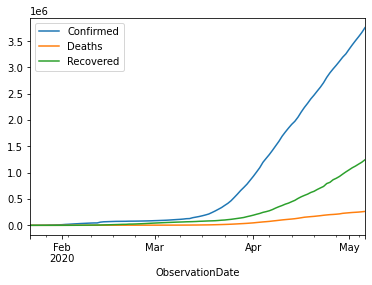

In [163]:
import seaborn as sns
case_over_time.plot()

In [164]:
clean_data.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
1,2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
2,3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
3,4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
4,5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0


In [165]:
country = clean_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()

C:\Anaconda3\envs\daailab2020\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<BarContainer object of 5 artists>

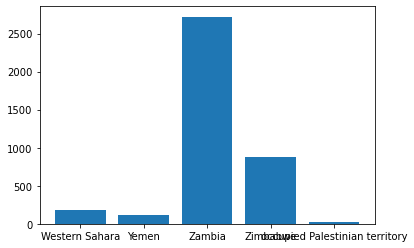

In [181]:
top5 = country.tail(5)
plt.bar(top5.index,top5['Confirmed'])

In [175]:
country.loc['India']

Confirmed    726230
Deaths        23624
Recovered    161596
Name: India, dtype: int64

In [183]:
country.sort_values('Confirmed',inplace=True)

In [184]:
country.tail(5)

,Confirmed,Deaths,Recovered
Country/Region,,,
Germany,5527711,160821,3053958
Mainland China,7142888,291611,5167697
Spain,7403374,754528,2974098
Italy,7406494,934608,1913814
US,27613467,1391129,2853859


<BarContainer object of 5 artists>

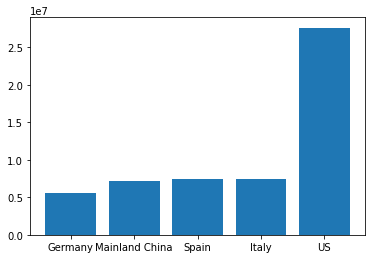

In [185]:
top5 = country.tail(5)
plt.bar(top5.index,top5['Confirmed'])

<BarContainer object of 5 artists>

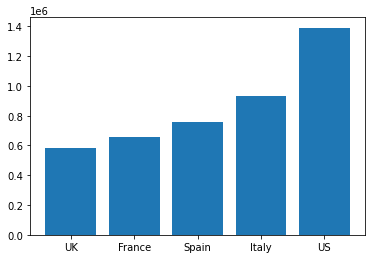

In [186]:
country.sort_values('Deaths',inplace=True)
top5 = country.tail(5)
plt.bar(top5.index,top5['Deaths'])